<a href="https://colab.research.google.com/github/lucas-aranha/effect-of-climatic-factors-on-dengue-dynamics-in-belem/blob/main/notebooks/proj1_den_belem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 Function Definition**

### 1.1 Importing Libraries

In [ ]:
import numpy            as np
import pandas           as pd
import statsmodels.api  as sm
import seaborn          as sns
import matplotlib.pylab as plt
import scipy.stats      as stats

###  1.2   Reading dataset function



In [ ]:
def load_dataset(filename):

    data_base = pd.read_excel(filename, index_col=0)
    
    return data_base

###  1.3 Cox-Stuart test function

In [ ]:
def cox_stuart(timeseries):

  import json

  n = len(timeseries)
  timeseries_c = timeseries
  if n % 2 == 1:
    del timeseries_c[n // 2]
  c = n // 2

  n_pos = n_neg = 0
  for i in range(c):
    diff = timeseries_c[i + c] - timeseries[i]
    if diff > 0:
      n_pos += 1
    elif diff < 0:
      n_neg += 1
    else:
      continue

  number = n_pos + n_neg
  k = min(n_pos, n_neg)
  p_value = 2 * stats.binom.cdf(k, number, 0.5)
  trend = ['Increasing', 'Decreasing', 'No trend']

  if n_pos > n_neg and p_value < 0.05:
    print('   fall: {}'.format(n_neg))
    print('   rise: {}'.format(n_pos))
    print('p-value: {}'.format(p_value))
    print('  trend: {}'.format(trend[0]))
  elif n_neg > n_pos and p_value < 0.05:
    print('   fall: {}'.format(n_neg))
    print('   rise: {}'.format(n_pos))
    print('p-value: {}'.format(p_value))
    print('  trend: {}'.format(trend[1]))
  else:
    print('   fall: {}'.format(n_neg))
    print('   rise: {}'.format(n_pos))
    print('p-value: {}'.format(p_value))
    print('  trend: {}'.format(trend[2]))

###  1.4 Kruskal-Wallis test function

In [ ]:
def kruskal_wallis(timeseries):

  from scipy import stats
  
  array = timeseries.to_numpy()

  n = int(len(timeseries) / 12)
  years = np.zeros([n, 12], dtype=int)

  i, j = 0, 12
  while i < n:
    years[i, :] = array[j-12:j]
    i += 1
    j += 12

  k_w = stats.kruskal(years[0, :], years[1, :], years[2, :], years[3, :], 
                       years[4, :], years[5, :], years[6, :], years[7, :], 
                       years[8, :], years[9, :], years[10, :], years[11, :], 
                       years[12, :], years[13, :])
  if k_w[1] <= 0.05:
    print('p-value:{}'.format(k_w[1]))
    print('This series is seasonal')
  else:
    print('p-value:{}'.format(k_w[1]))
    print('No seasonal')

###  1.5 Augmented Dickey-Fuller test function

In [ ]:
def test_stationarity(timeseries):

  from statsmodels.tsa.stattools import adfuller

  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
      dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

###  1.6 ACF and PACF plotting function

In [ ]:
def acf_pacf(dataframe, lags, title, color):

  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))

  sm.graphics.tsa.plot_acf(dataframe.values.squeeze(), lags=lags, title=title[0], ax=ax1, color=color)
  sm.graphics.tsa.plot_pacf(dataframe.values.squeeze(), lags=lags, title=title[1], ax=ax2, color=color)

  plt.show()

###  1.7   Função de amplitude-média

In [ ]:
def amplitude_average(dataframe):

  mean_df = dataframe.groupby(dataframe.index.year).mean()
  max_df = dataframe.groupby(dataframe.index.year).max()
  min_df = dataframe.groupby(dataframe.index.year).min()
  w_df = max_df - min_df

  return mean_df, w_df

###  1.8 Função de transformação

In [ ]:
def log_scale(timeseries):

  ln = np.log(timeseries + 1)
  ln_ts = pd.Series(ln, timeseries.index)

  return ln_ts

### 1.9 Coefficient estimation function

In [ ]:
def estimate_coef(x, y): 
    
    n = np.size(x) 
  
    
    m_x, m_y = np.mean(x), np.mean(y) 
  
    
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return b_0, b_1

# **2 Data Visualization and Preparation**


### 2.1   Reading datasets

In [ ]:
data_set = load_dataset('dengue_belem_mensal_2007_2020.xlsx')
data_set

,dengue_cases
date,
2007-01-01,220
2007-02-01,364
2007-03-01,544
2007-04-01,327
2007-05-01,117
...,...
2020-08-01,3
2020-09-01,5
2020-10-01,2


### 2.2   Time series plotting

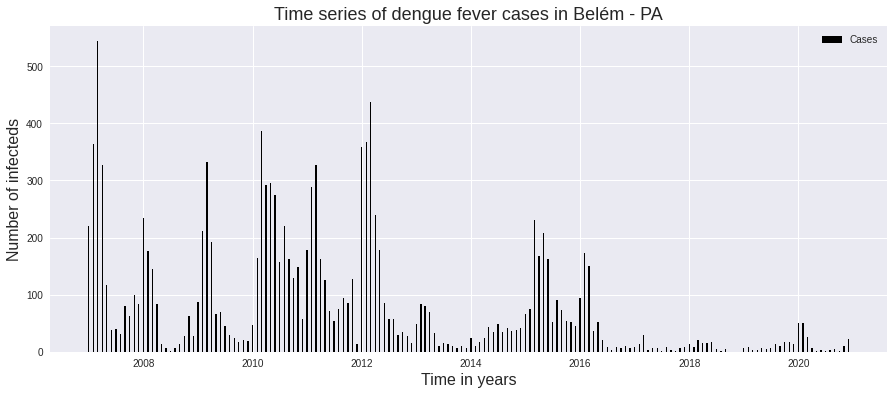

In [ ]:
plt.style.use('seaborn')

fig1, ax = plt.subplots(figsize=(15, 6))

#ax.plot(data_set.index, data_set.dengue_cases, color='black', label='Dengue fever cases')
ax.bar(data_set.index, data_set.dengue_cases, 9, color='#000000', error_kw={'ecolor': '0.3'}, label='Cases')

ax.set_title('Time series of dengue fever cases in Belém - PA', size=18)
ax.set_xlabel('Time in years', size=16)
ax.set_ylabel('Number of infecteds', size=16)
ax.legend()

plt.show()

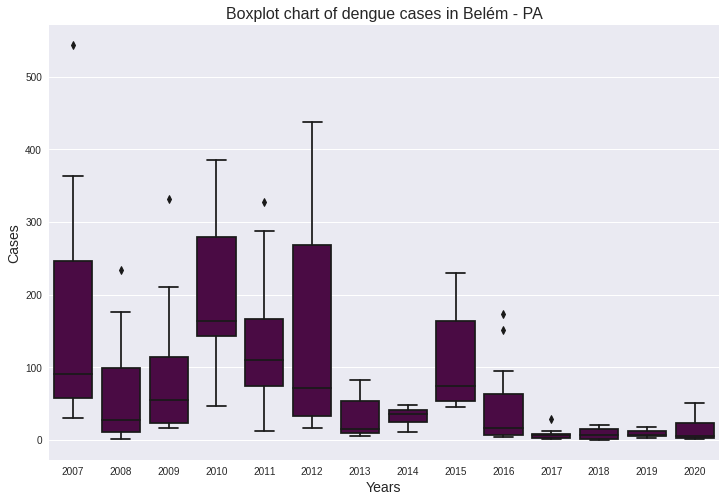

In [ ]:
fig2, ax = plt.subplots(figsize=(12,8))

sns.boxplot(x=data_set.index.year, y=data_set.dengue_cases, ax=ax, color='#55004D')
ax.set_title('Boxplot chart of dengue cases in Belém - PA', size=16)
ax.set_xlabel('Years', size=14)
ax.set_ylabel('Cases', size=14)

plt.show();

### 2.3 Data Transformation

#### 2.3.1 Verification of the proportionality of means 

In [ ]:
mean, w = amplitude_average(data_set.dengue_cases)
b_0, b_1 = estimate_coef(mean, w)
lr = b_0 + b_1 * mean

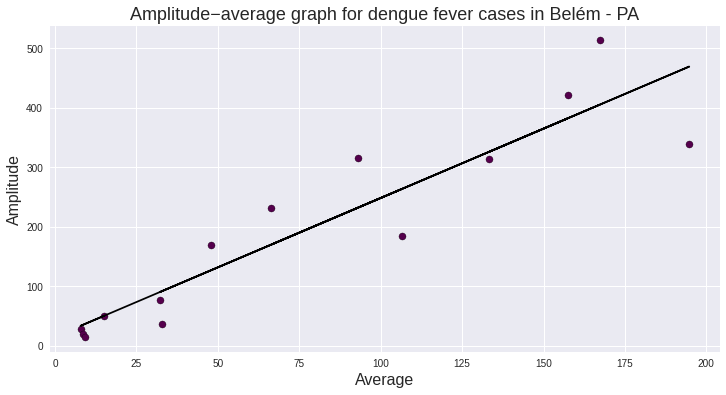

In [ ]:
fig4, ax = plt.subplots(figsize=(12, 6))

ax.scatter(mean, w, s=50, edgecolor='black', c='#55004D')
ax.plot(mean, lr, color='#000000')
ax.set_title('Amplitude−average graph for dengue fever cases in Belém - PA', size=18)
ax.set_xlabel('Average', size=16)
ax.set_ylabel('Amplitude', size=16)

plt.show();

#### 2.3.2 Series logarithmization

In [ ]:
dengue_log = log_scale(data_set.dengue_cases)
moving_avg = dengue_log.ewm(span=7).mean()

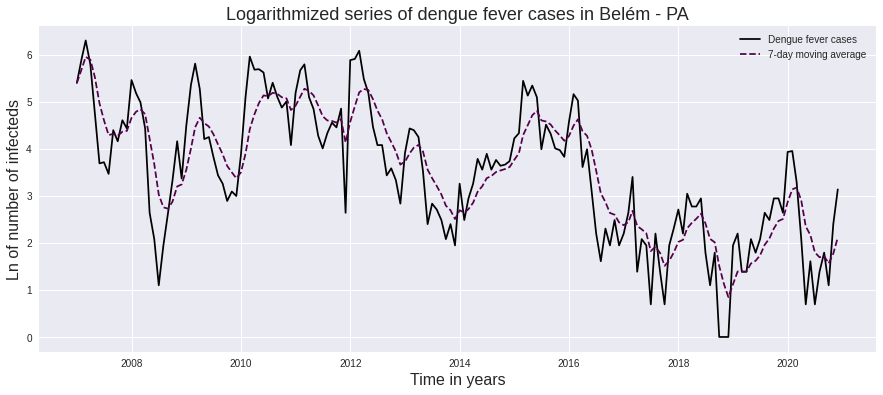

In [ ]:
fig6, ax = plt.subplots(figsize=(15, 6))

ax.plot(dengue_log.index, dengue_log, color='black', label='Dengue fever cases')
ax.plot(dengue_log.index, moving_avg, color='#55004D', linestyle='--', label='7-day moving average')

ax.set_title('Logarithmized series of dengue fever cases in Belém - PA', size=18)
ax.set_xlabel('Time in years', size=16)
ax.set_ylabel('Ln of number of infecteds', size=16)
ax.legend()

plt.show()

### 2.3 Trend and Seasonality

#### 2.3.1 Hypothesis tests

In [ ]:
print(cox_stuart(dengue_log))

   fall: 69
   rise: 14
p-value: 6.802593482929834e-10
  trend: Decreasing
None


In [ ]:
print(kruskal_wallis(dengue_log))

p-value:3.0324256342664704e-15
This series is seasonal
None


#### 2.3.2 Autocorrelation and Partial Autocorrelation Functions

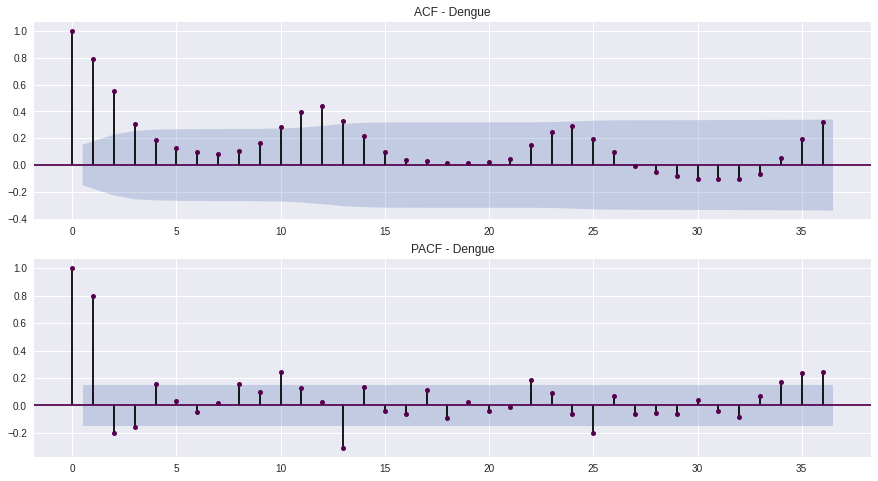

In [ ]:
title = ['ACF - Dengue', 'PACF - Dengue']
acf_pacf(data_set.dengue_cases, 36, title, '#55004D')

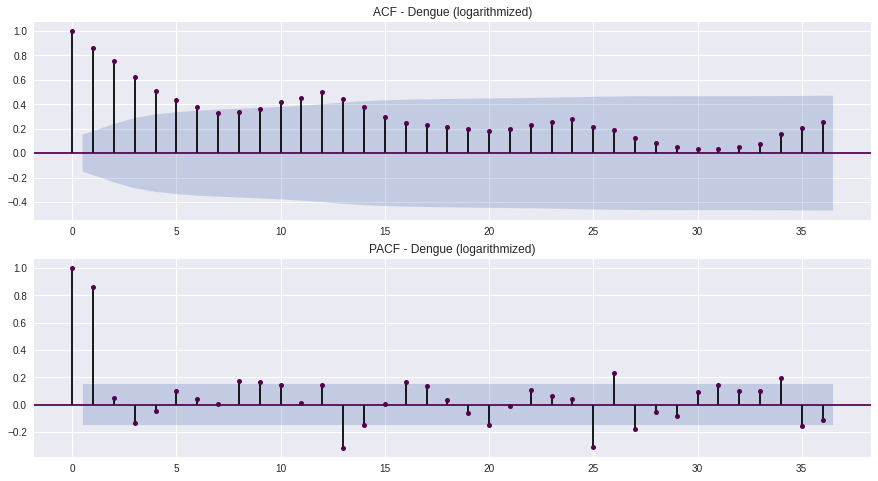

In [ ]:
title = ['ACF - Dengue (logarithmized)', 'PACF - Dengue (logarithmized)']
acf_pacf(dengue_log, 36, title, '#55004D')

# **3. SARIMAX Model Application**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(dengue_log, freq='MS', order=(1, 1, 1), seasonal_order=(1, 1, 1, 6)).fit()
model_pred = model.predict()

pred = np.exp(model_pred) - 1
pred[0] = data_set.dengue_cases[0]

In [ ]:
import sklearn.metrics as metrics

rmse = np.sqrt(((data_set.dengue_cases - pred)**2).mean())
r2 = metrics.r2_score(data_set.dengue_cases, pred)
print('RMSE: {}'.format(rmse))
print('R_squared: {}'.format(r2))

RMSE: 76.53749469430625
R_squared: 0.42531849032193725


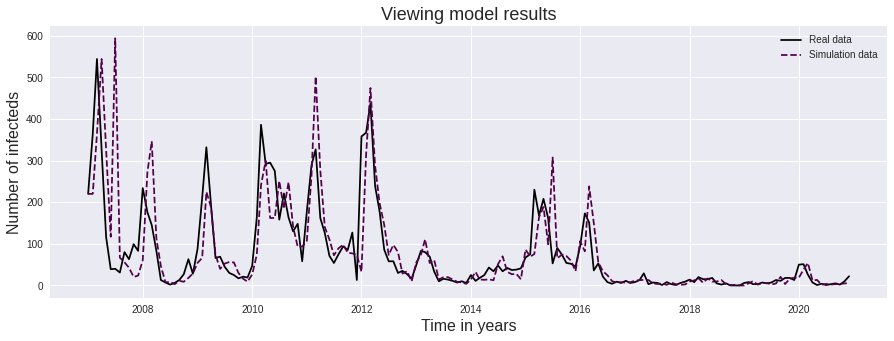

In [ ]:
fig8, ax = plt.subplots(figsize=(15, 5))
ax.plot(data_set.index, data_set.dengue_cases, color='black', label='Real data')
ax.plot(data_set.index, pred, color='#55004D', linestyle='--', label='Simulation data')

ax.set_title('Viewing model results', size=18)
ax.set_xlabel('Time in years', size=16)
ax.set_ylabel('Number of infecteds', size=16)
ax.legend()

plt.show()